## Computer Vision & Image Processing: **Image Transformation and Interpolation in Python**

*Submitted by:*

**Christian Elijah Darvin**

BCS32

College of Information and Computer Studies - De La Salle University Dasmariñas

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import cv2 as cv

print(f"NumPy Version: {np.__version__}")
print(f"Matplotlib Version: {matplotlib.__version__}")
print(f"OpenCV Version: {cv.__version__}")

NumPy Version: 2.1.1
Matplotlib Version: 3.10.0
OpenCV Version: 4.11.0


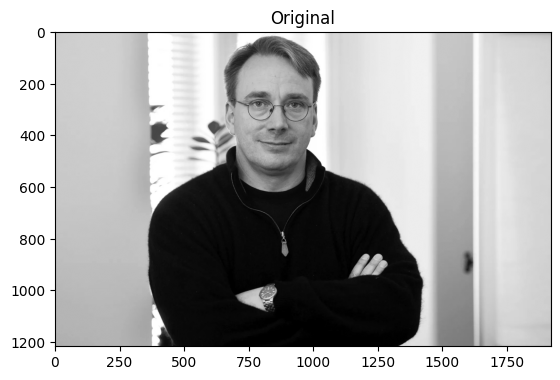

In [5]:
linus_torvalds_img = cv.imread("./images/Cohen-Linus-Torvalds.png", 0)
plt.imshow(linus_torvalds_img, cmap="gray")
plt.title("Original")
plt.show()

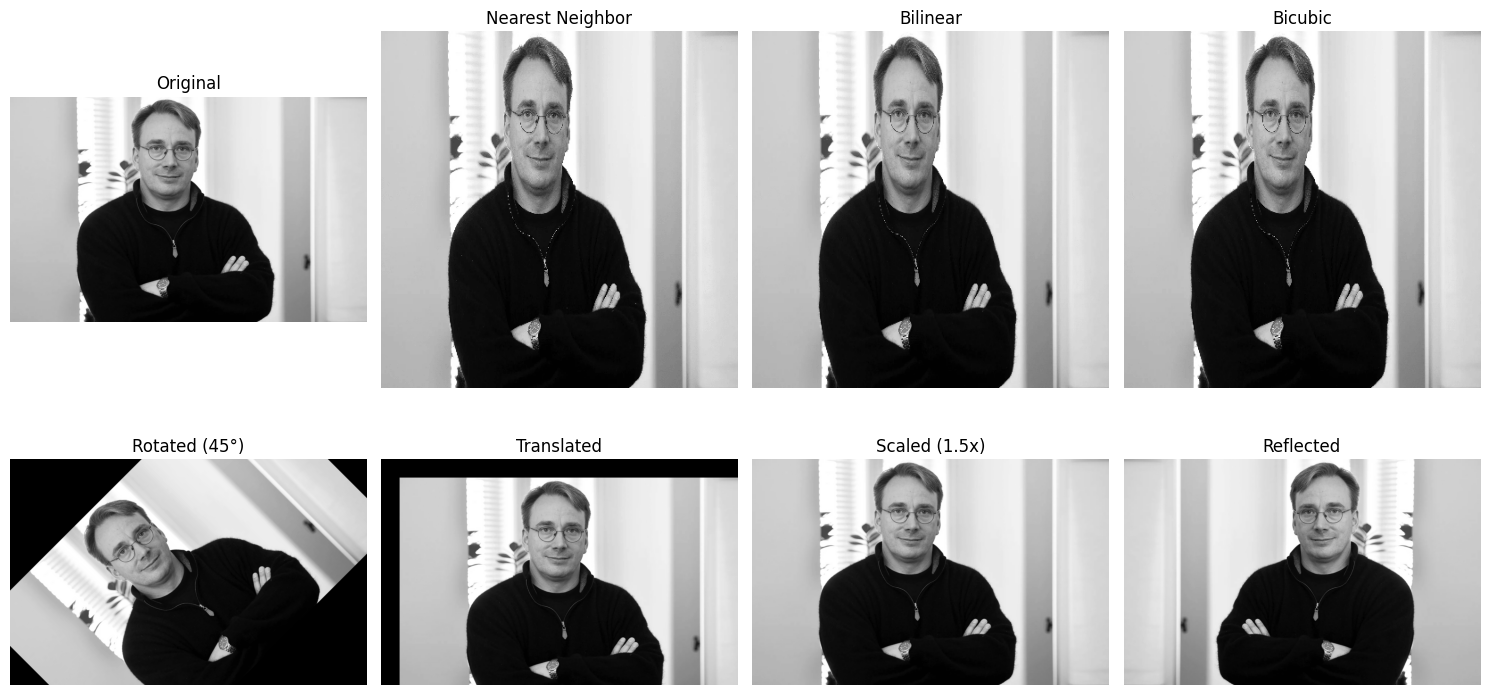

In [20]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

methods = {
    "Nearest Neighbor": cv.INTER_NEAREST,
    "Bilinear": cv.INTER_LINEAR,
    "Bicubic": cv.INTER_CUBIC,
}

new_size = (400, 400)
plt.figure(figsize=(15, 8))  # Adjusted figure size for 4 columns, 2 rows

# Display original image
plt.subplot(2, 4, 1)
plt.imshow(cv.cvtColor(linus_torvalds_img, cv.COLOR_BGR2RGB))
plt.title("Original")
plt.axis("off")

# Apply interpolation methods
for idx, (method_name, method) in enumerate(methods.items(), start=2):
    resized_img = cv.resize(linus_torvalds_img, new_size, interpolation=method)

    plt.subplot(2, 4, idx)  # 2 rows, 4 columns
    plt.imshow(cv.cvtColor(resized_img, cv.COLOR_BGR2RGB))
    plt.title(method_name)
    plt.axis("off")

# Image transformations
scale_factor = 1.5
scaled_dim = (
    int(linus_torvalds_img.shape[1] * scale_factor),
    int(linus_torvalds_img.shape[0] * scale_factor),
)
scaled_img = cv.resize(linus_torvalds_img, scaled_dim)

center = (linus_torvalds_img.shape[1] // 2, linus_torvalds_img.shape[0] // 2)
rotation_matrix = cv.getRotationMatrix2D(center, 45, 1.0)
rotated_image = cv.warpAffine(
    linus_torvalds_img,
    rotation_matrix,
    (linus_torvalds_img.shape[1], linus_torvalds_img.shape[0]),
)

translation_matrix = np.float32([[1, 0, 100], [0, 1, 100]])
translated_image = cv.warpAffine(
    linus_torvalds_img,
    translation_matrix,
    (linus_torvalds_img.shape[1], linus_torvalds_img.shape[0]),
)

reflected_image = cv.flip(linus_torvalds_img, 1)

# Display transformations
plt.subplot(2, 4, 5)
plt.imshow(cv.cvtColor(rotated_image, cv.COLOR_BGR2RGB))
plt.title("Rotated (45°)")
plt.axis("off")

plt.subplot(2, 4, 6)
plt.imshow(cv.cvtColor(translated_image, cv.COLOR_BGR2RGB))
plt.title("Translated")
plt.axis("off")

plt.subplot(2, 4, 7)
plt.imshow(cv.cvtColor(scaled_img, cv.COLOR_BGR2RGB))
plt.title("Scaled (1.5x)")
plt.axis("off")

plt.subplot(2, 4, 8)
plt.imshow(cv.cvtColor(reflected_image, cv.COLOR_BGR2RGB))
plt.title("Reflected")
plt.axis("off")

plt.tight_layout()
plt.show()